<a href="https://colab.research.google.com/github/nshaganti/nshaganti-double-machine-learning-approach-lp/blob/main/Analysis_Code_Personalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/nshaganti/nshaganti-double-machine-learning-approach-lp.git

Cloning into 'nshaganti-double-machine-learning-approach-lp'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 1.20 MiB | 9.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import os
repo = 'nshaganti-double-machine-learning-approach-lp'
if os.getcwd().split("/")[-1] == repo:
  print("Already in the correct directory")
else:
  os.chdir(repo)
  print(f"Changed working directory to: {repo}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import graphviz as gr

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Changed working directory to: nshaganti-double-machine-learning-approach-lp


In [150]:
train = pd.read_csv("non_rand_discount.csv", delimiter=";")
test = pd.read_csv("random_data.csv")

In [151]:
train.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,45,15,30.0,55.0,10.0,160.0,0,0,0,0.0,0.0,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,10.0,0.0,0,0,0,0.0,0.0,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,30,35.0,0.0,20.0,50.0,0,0,0,0.0,0.0,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,135,120.0,10.0,40.0,130.0,0,0,0,0.0,0.0,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,10.0,95.0,25.0,20.0,0,0,0,0.0,0.0,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [152]:
test.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1503.22,20.0,35,1.0,MA,23,55.16
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,5.0,5.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1798.30,60.0,29,1.0,MG,18,29.92
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1122.97,0.0,30,1.0,RJ,20,56.15
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,25,95.0,10.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1217.08,10.0,32,0.0,BA,20,50.85
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,966.58,0.0,30,0.0,PB,22,48.33


In [153]:
# understand the inferred data types
test.dtypes

,0
spend_1m_baby,int64
spend_2m_baby,int64
spend_3m_baby,int64
spend_4m_baby,int64
spend_5m_baby,int64
spend_6m_baby,float64
spend_1m_clothes,int64
spend_2m_clothes,float64
spend_3m_clothes,float64
spend_4m_clothes,float64


In [154]:
train["discount"] = (train["discount"].str.split(" ").str[-1]).astype(float)

In [155]:
# check for any missing data
test.isna().sum()

,0
spend_1m_baby,0
spend_2m_baby,0
spend_3m_baby,0
spend_4m_baby,0
spend_5m_baby,0
spend_6m_baby,0
spend_1m_clothes,0
spend_2m_clothes,0
spend_3m_clothes,0
spend_4m_clothes,0


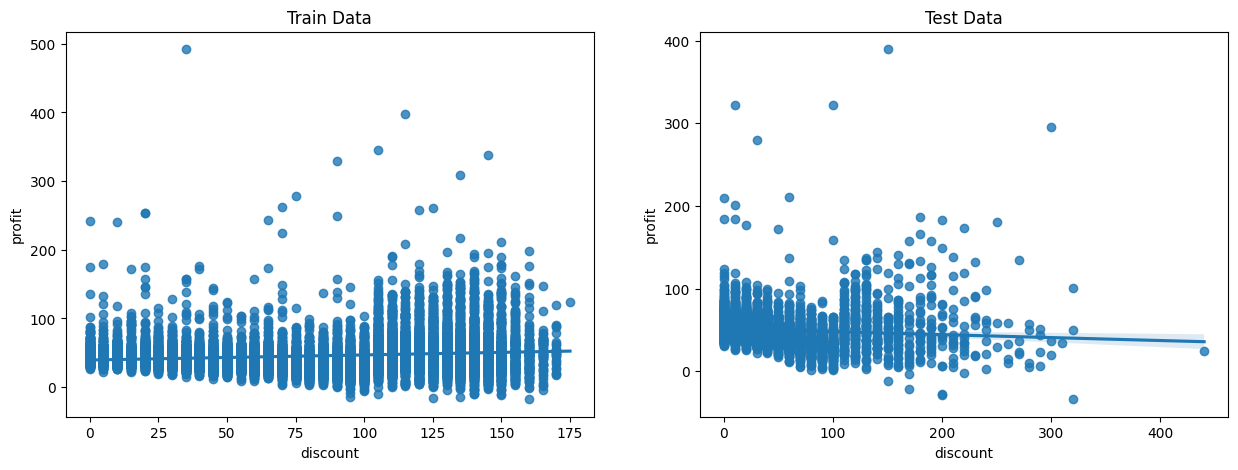

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(x='discount', y='profit', data=train, ax=axes[0])
axes[0].set_title('Train Data')

sns.regplot(x='discount', y='profit', data=test, ax=axes[1])
axes[1].set_title('Test Data')

plt.show()

The left plot shows a positive relationship between discount and profits. We cannot say this relationship is causal, because there might be confounding variables that were unaccounted for.

As for the right plot, it shows a negative relationship between discount and profits. Since discount was randomly assigned in this dataset, we can say that this relationship captures the causal effect of discount on profits.

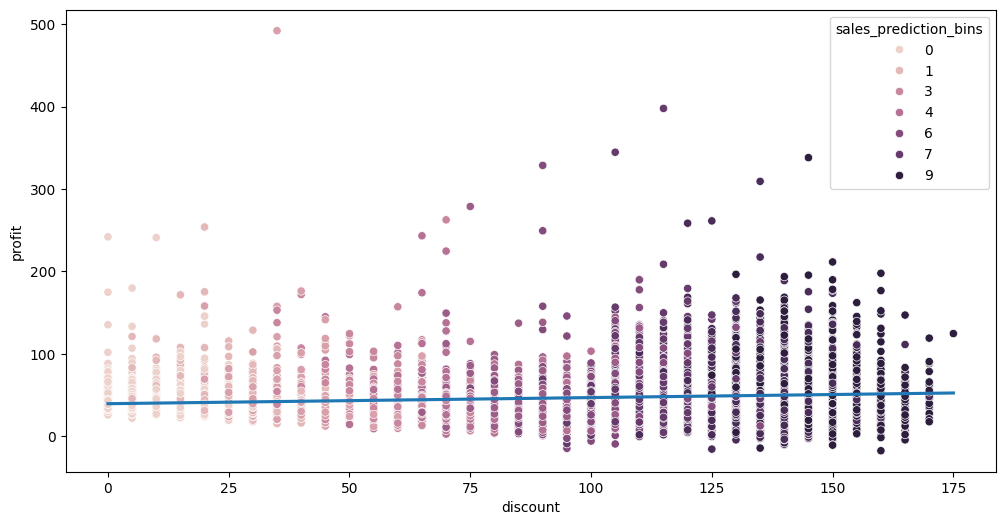

In [157]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train, x="discount", y="profit", hue="sales_prediction_bins")
sns.regplot(x="discount", y="profit", data=train, scatter=False)
plt.show()

The relationship between profit and discount seems to be positive. We probably can't interpret this relationship as causal, because customers with higher discounts also have higher sales predictions. Hence

$$
E[Profit_0|Discount=High] >  E[Profit_0|Discount=Low]
$$

In other words, high discount customers would still buy more than low discount customers even in the absence of high discounts.

In [158]:
model = smf.ols('profit ~ discount + C(sales_prediction_bins)', data=train).fit()
print(model.summary())
beta_1_estimate = model.params['discount']
print(f"\nThe estimate of β1 is: {beta_1_estimate}")

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     96.23
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          5.30e-194
Time:                        23:33:51   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14989   BIC:                         1.363e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [159]:
debias_model = smf.ols('discount ~ sales_prediction_bins', data=train).fit()
print(debias_model.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 2.285e+05
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:33:51   Log-Likelihood:                -57228.
No. Observations:               15000   AIC:                         1.145e+05
Df Residuals:                   14998   BIC:                         1.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.61

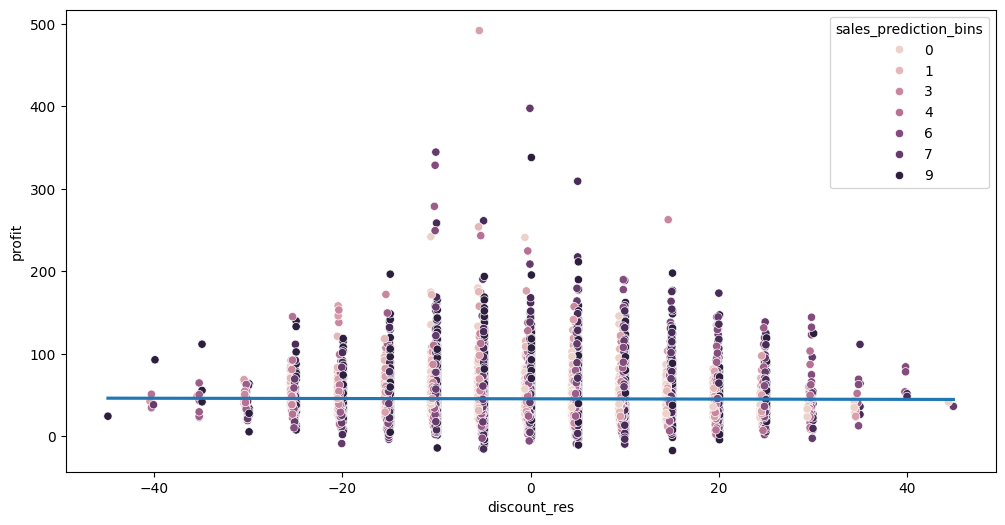

In [160]:
train_debiased = train.assign(discount_res = train["discount"] - debias_model.predict(train))

plt.figure(figsize=(12,6))
sns.scatterplot(data=train_debiased, x="discount_res", y="profit", hue="sales_prediction_bins")
sns.regplot(x="discount_res", y="profit", data=train_debiased, scatter=False)
plt.show()

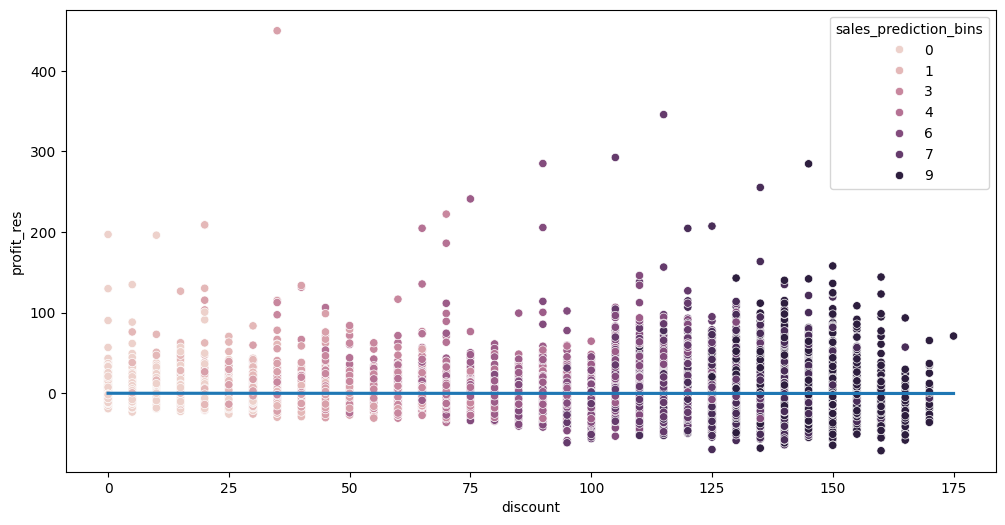

In [161]:
denoise_model = smf.ols("profit~C(sales_prediction_bins)", data=train).fit()

train_debiased_denoised = train_debiased.assign(profit_res = train_debiased["profit"] - denoise_model.predict(train_debiased))

plt.figure(figsize=(12,6))
sns.scatterplot(data=train_debiased_denoised, x="discount", y="profit_res", hue="sales_prediction_bins")
sns.regplot(x="discount", y="profit_res", data=train_debiased_denoised, scatter=False)
plt.show()

It's hard to see from the plot, but if we show the variance for profits and profit residuals, we can see that the latter has smaller variance. That is because some variance was explained away by using `sales_prediction_bin`

In [162]:
denoise_model.resid.var(), train["profit"].var()

(512.5731256022974, 545.4015163032522)

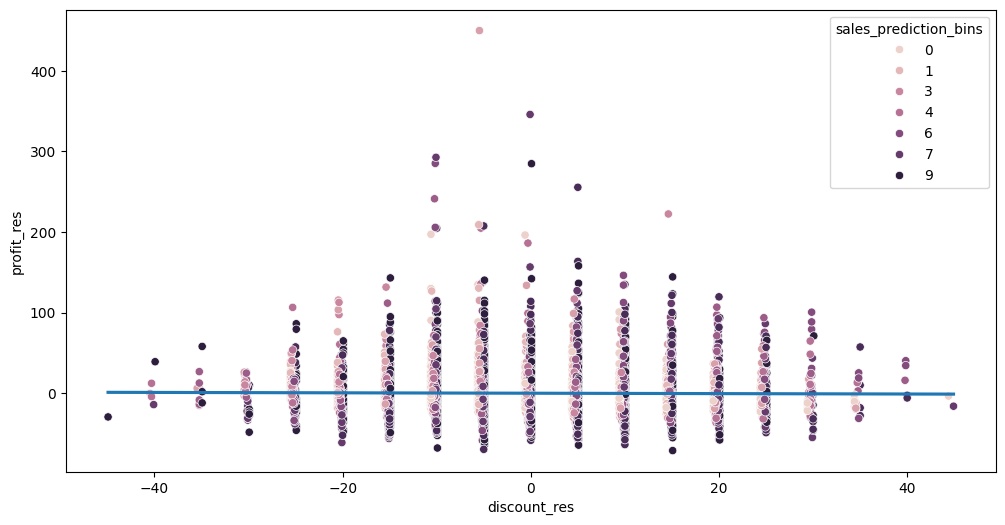

In [163]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_debiased_denoised, x="discount_res", y="profit_res", hue="sales_prediction_bins")
sns.regplot(x="discount_res", y="profit_res", data=train_debiased_denoised, scatter=False)
plt.show()

In [164]:
final_model = smf.ols("profit_res~discount_res", data=train_debiased_denoised).fit()

print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:             profit_res   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.133
Date:                Sat, 01 Mar 2025   Prob (F-statistic):              0.144
Time:                        23:33:58   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14998   BIC:                         1.362e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.074e-14      0.185    2.2e-13   

In [165]:
print(f"\nThe estimate of discount effect from full model is: {beta_1_estimate}")


The estimate of discount effect from full model is: -0.024708440853955634


The coefficient with breaking the regression into the FWL steps is exactly the same as the one we got from regressing discount on `sales_prediction_bin` and discount at the same time. This is not a surprising fact, as it is precisely what the FWL theorem tells us.

In [166]:
# Calculate the average sales per state
avg_sales_per_state = train.groupby('cust_state')['sales'].mean().to_dict()

# Function to convert state to numeric using average sales
def state_to_numeric(df, avg_sales_dict):
    df['cust_state'] = df['cust_state'].map(avg_sales_dict)
    return df

# Apply the function to the training dataset
train_processed = state_to_numeric(train, avg_sales_per_state)

In [167]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_predict

not_features = ["sales", "profit", "cust_state", "discount"]

X = list(train_processed.drop(columns=not_features).columns)
T = "discount"

np.random.seed(123)

debias_m = LGBMRegressor(max_depth=3)
t_res = train[T] - cross_val_predict(debias_m, train_processed[X], train_processed[T], cv=5)

train_debiased = train_processed.assign(discount_res = t_res)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 41
[LightGBM] [Info] Start training from score 78.013333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

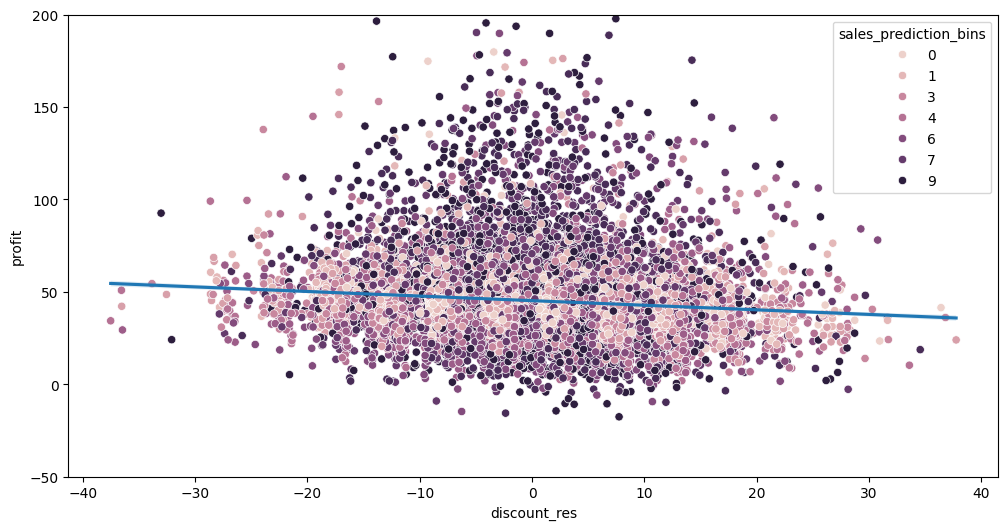

In [169]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_debiased, x="discount_res", y="profit", hue="sales_prediction_bins")
sns.regplot(x="discount_res", y="profit", data=train_debiased, scatter=False)
plt.ylim(-50, 200)
plt.show()

Once we implement the debiasing step in FWL, using machine learning models, we can see that the bias diminishes. We are now able to find a negative relationship between discount and profits, which is more in line with the results we saw before. However, we can see that the bias is not completely gone, as customers with low sales predictions (sales_prediction_bins=0 and 1) are still concentrated in the low discount regions. So, low and high discount customers are still not 100% comparable.

In [170]:
Y = "profit"
np.random.seed(123)
denoise_m = LGBMRegressor(max_depth=3)
y_res = train[Y] - cross_val_predict(debias_m, train_processed[X], train_processed[Y], cv=5)
train_denoised = train_debiased.assign(profit_res = y_res)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 41
[LightGBM] [Info] Start training from score 45.102330
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

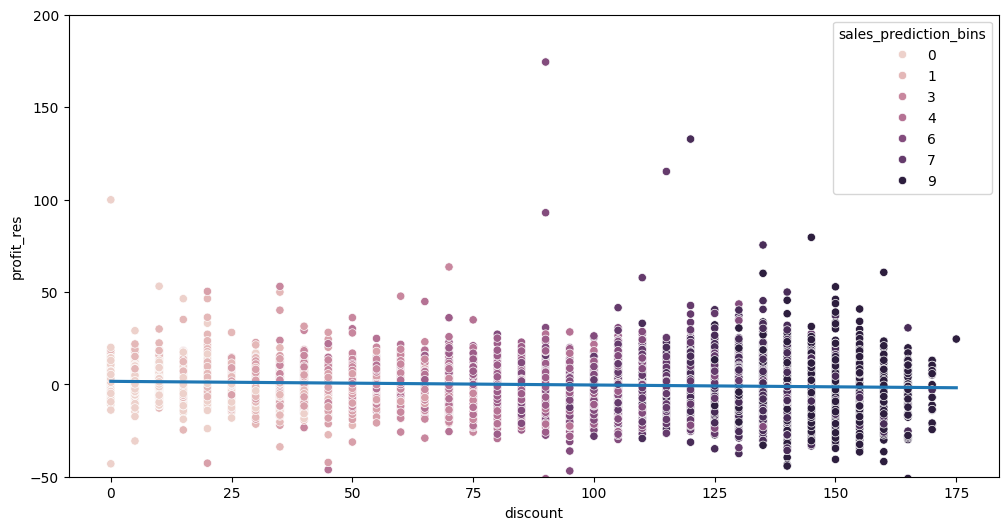

In [171]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_denoised, x="discount", y="profit_res", hue="sales_prediction_bins")
sns.regplot(x="discount", y="profit_res", data=train_denoised, scatter=False)
plt.ylim(-50, 200)
plt.show()

The denoising step in the FWL theorem doesn't change the direction of the relationship between discount and profits. However, it significantly reduces variance in the outcome variable (profit), making the relationship between discount and profit more apparent.

Another thing to notice is that this denoising and debiasing procedure made the data centered at zero. This is expected, but it makes interpretation harder. One possible workaround is to add the overall discount and profit averages to their respective residualized versions.

In [172]:
final_model = smf.ols("profit_res~discount_res", data=train_denoised).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:             profit_res   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     738.3
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          9.45e-159
Time:                        23:34:33   Log-Likelihood:                -55282.
No. Observations:               15000   AIC:                         1.106e+05
Df Residuals:                   14998   BIC:                         1.106e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0696      0.079      0.883   

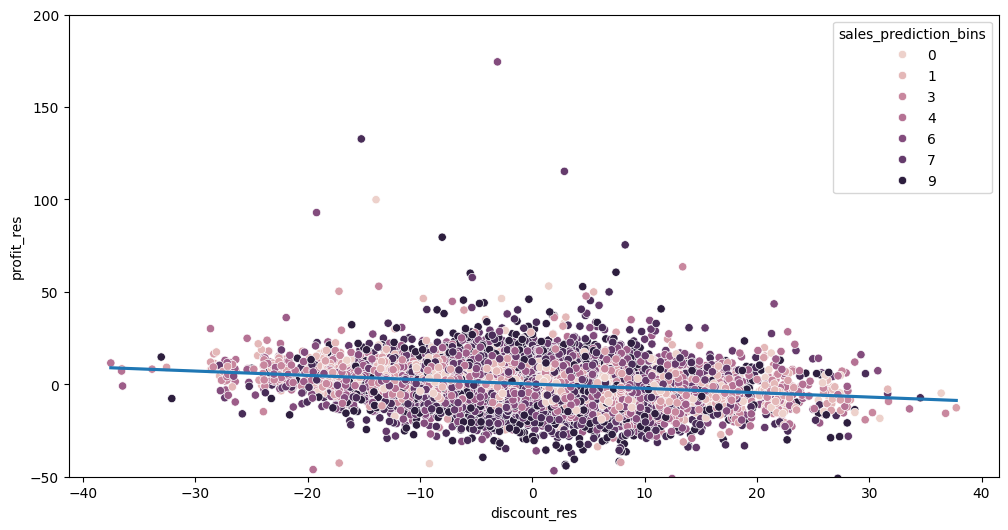

In [173]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_denoised, x="discount_res", y="profit_res", hue="sales_prediction_bins")
sns.regplot(x="discount_res", y="profit_res", data=train_denoised, scatter=False)
plt.ylim(-50, 200)
plt.show()

Just like when we controlled for `sales_prediction_bins` when using regression to estimate the impact of discount on profits, using Double/Debiased ML also yielded a negative coefficient. It looks like increasing the discount in one unit will decrease profits by about 0.23 units.

In [174]:
# Construct weights
train_denoised['w'] = train_denoised['discount_res'] ** 2

# Construct target
train_denoised['y'] = train_denoised['profit_res'] / train_denoised['discount_res']

In [175]:
not_features_final_model = ["sales", "profit", "cust_state", "discount", "sales_prediction", "sales_prediction_bins"]
X_final_model = list(train_processed.drop(columns=not_features_final_model).columns)

model_final = LGBMRegressor(max_depth=3)

# use a weighted regression ML model to predict the target with the weights.
model_final.fit(X=train_denoised[X_final_model], y=train_denoised['y'], sample_weight=train_denoised['w'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 39
[LightGBM] [Info] Start training from score -0.234717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(max_depth=3)

In [176]:
test = state_to_numeric(test, avg_sales_per_state)

In [177]:
test_pred = test.assign(cate=model_final.predict(test[X_final_model]))
test_pred.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,age,gender,cust_state,tenure,profit,cate
0,0,0,0,0,0,0.0,25,50.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1503.22,20.0,35,1.0,2579.424297,23,55.16,-0.159556
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,5.0,5.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1798.30,60.0,29,1.0,2553.222774,18,29.92,-0.246723
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1122.97,0.0,30,1.0,2518.635848,20,56.15,-0.254766
3,10,15,0,25,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,15,25,95.0,10.0,0.0,0.0,0,0,0,0.0,0.0,0.0,1217.08,10.0,32,0.0,2446.648394,20,50.85,-0.199446
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,966.58,0.0,30,0.0,2562.461439,22,48.33,-0.254766


In [179]:
def elast(data, t, y):
    cov_matrix = np.cov(data[y], data[t])
    return cov_matrix[1, 0] / cov_matrix[1, 1]

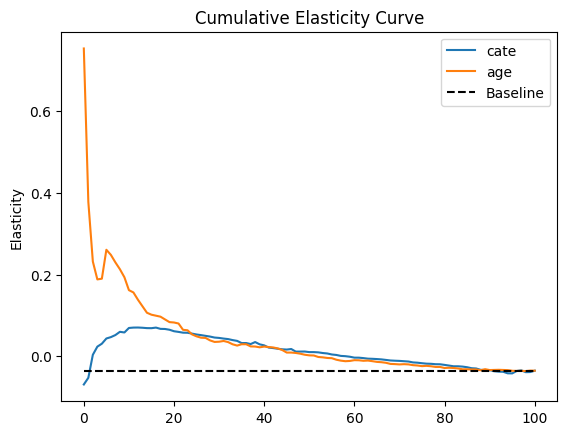

In [180]:
def cumulative_elast_curve(dataset, prediction, y, t, min_periods=30, steps=100, ascending=False):
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=ascending).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([elast(ordered_df.head(rows), t, y) for rows in n_rows])

cum_elast_cate = cumulative_elast_curve(test_pred, "cate", y="profit", t="discount")
cum_elast_age = cumulative_elast_curve(test_pred, "age", y="profit", t="discount")

plt.plot(cum_elast_cate, label="cate")
plt.plot(cum_elast_age, label="age")
plt.hlines(elast(test_pred, "discount", "profit"), 0, 100, linestyle="--", color="black", label="Baseline")
plt.ylabel("Elasticity")
plt.title("Cumulative Elasticity Curve")
plt.legend()
plt.show()

 The cumulative elasticity curve shows that our treatment effect (TE) model starts further from the ATE and converges slowlier to it. This means that the model is better at distinguishing customers with high TE from those with low TE. It looks better than simply using Age, but not by much.

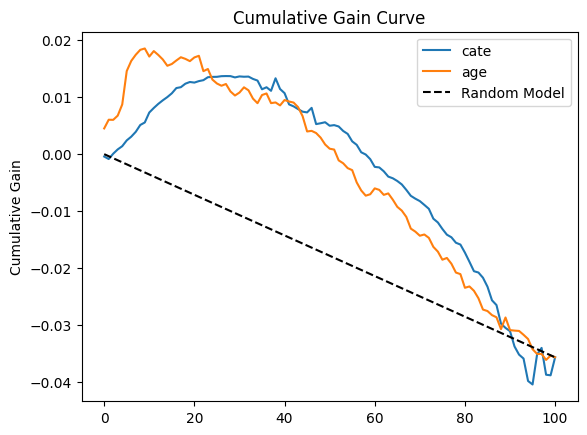

In [182]:
def cumulative_gain(dataset, prediction, y, t, min_periods=30, steps=100, ascending=False):
    size = dataset.shape[0]
    ordered_df = dataset.sort_values(prediction, ascending=ascending).reset_index(drop=True)
    n_rows = list(range(min_periods, size, size // steps)) + [size]
    return np.array([elast(ordered_df.head(rows), t, y) * (rows/size) for rows in n_rows])

gain_cate = cumulative_gain(test_pred, "cate", y="profit", t="discount", ascending=False)
gain_age = cumulative_gain(test_pred, "age", y="profit", t="discount", ascending=False)

# Plotting the cumulative gain curve
plt.plot(gain_cate, label="cate")
plt.plot(gain_age, label="age")
plt.plot([0, 100], [0, elast(test_pred, "discount", "profit")], linestyle="--", label="Random Model", color="black")
plt.ylabel("Cumulative Gain")
plt.title("Cumulative Gain Curve")
plt.legend();

The cumulative gain curve tells a different story. While simply ordering by Age is better at distinguishing customers with a very positive treatment effect (the age curve starts above out model’s curve), our model is clearly better than simply using age to distinguish between customers with low and high treatment effects.

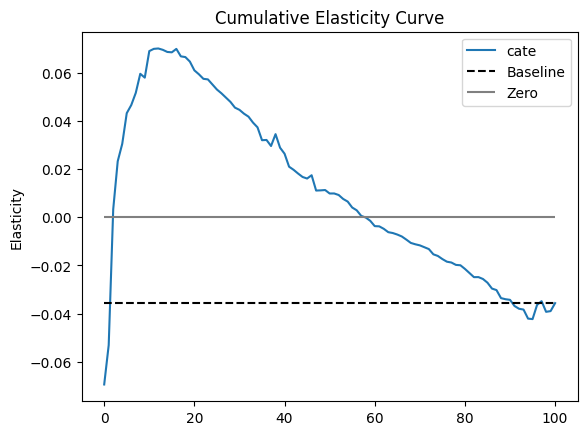

In [183]:
plt.plot(cum_elast_cate, label="cate")
plt.hlines(elast(test_pred, "discount", "profit"), 0, 100, linestyle="--", color="black", label="Baseline")
plt.hlines(0, 0, 100, linestyle="-", color="Grey", label="Zero")
plt.ylabel("Elasticity")
plt.title("Cumulative Elasticity Curve")
plt.legend()
plt.show()

In [184]:
np.quantile(test_pred["cate"], 0.5)

-0.24672277762938577

**Recommendation**: The cumulative elasticity curve says that, if we sort customers according to our treatment effect model, the top 60% of customers would all have a positive treatment effect. This means that, if we increase the discount for them, we would also increase profits. To add some conservatism to our recommendation, we could say that the e-commerce company should give discounts to whomever has a TE prediction above the 50 percentile.